In [1]:
from importlib import reload 
import mass_function as mf
import mass_profile as mp
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import quad
import astropy.units as u
import scipy
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline

/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
%%time
reload(mf)
press_s= mf.PressSchechter(m_l = np.logspace(4,16,100))

CPU times: user 3.95 s, sys: 51.5 ms, total: 4 s
Wall time: 3.95 s


In [12]:
%%time
reload(mf)
press_test= mf.PressSchechter_test(m_l = np.logspace(4,16,100))

CPU times: user 133 ms, sys: 3.91 ms, total: 137 ms
Wall time: 136 ms


## Integration tests

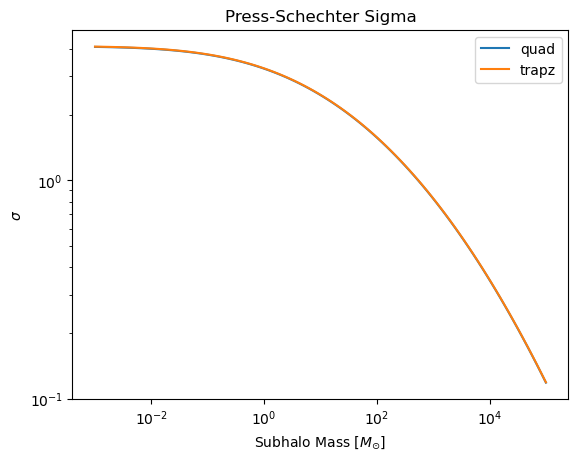

In [7]:
k = np.logspace(-3,5,100)
plt.title('Press-Schechter Sigma')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\sigma$')
plt.plot(k,press_s.sig, label='quad')
plt.plot(k,press_test.sig, label='trapz')
plt.legend()
plt.show()

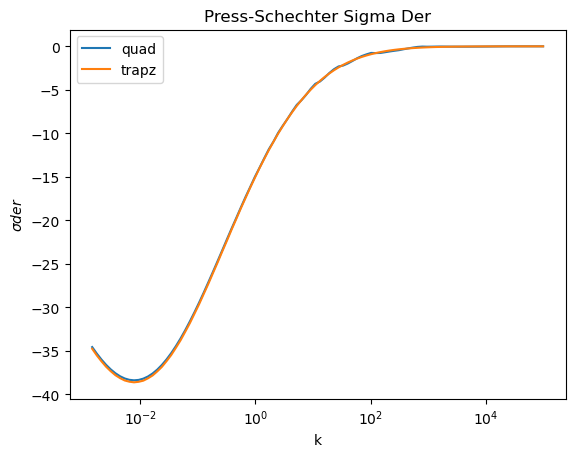

In [8]:
k = np.logspace(-3,5, 100)
plt.title('Press-Schechter Sigma Der')
plt.xlabel(r'k')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'$\sigma der$')
plt.plot(k[2:],press_s.der[2:], label='quad')
plt.plot(k[2:],press_test.der[2:], label='trapz')
plt.legend()
plt.show()

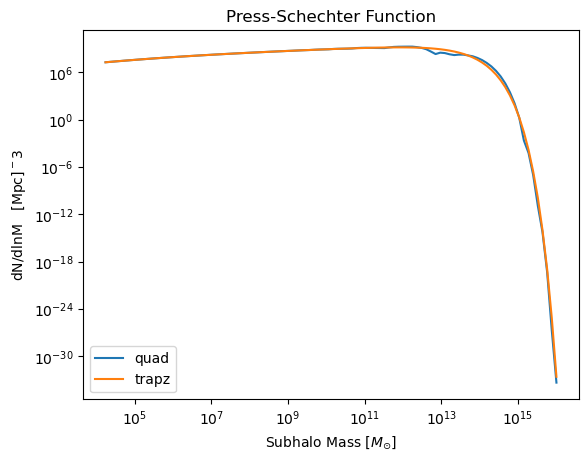

In [14]:
plt.title('Press-Schechter Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dN/dlnM $\,\,\,\, [\mathrm{Mpc}]^-3$')
plt.plot(press_s.m_l[2:],press_s.m_l[2:]*press_s.den_n_l[2:], label='quad')
plt.plot(press_test.m_l[2:],press_test.m_l[2:]*press_test.den_n_l[2:], label='trapz')
plt.legend()
plt.show()

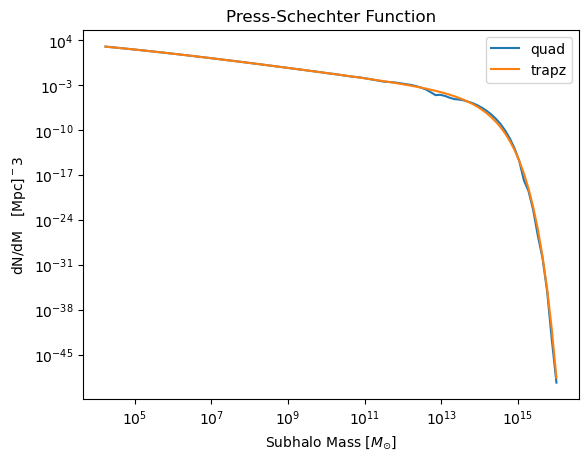

In [15]:
plt.title('Press-Schechter Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dN/dM $\,\,\,\, [\mathrm{Mpc}]^-3$')
plt.plot(press_s.m_l[2:],press_s.den_n_l[2:], label='quad')
plt.plot(press_test.m_l[2:],press_test.den_n_l[2:], label='trapz')
plt.legend()
plt.show()

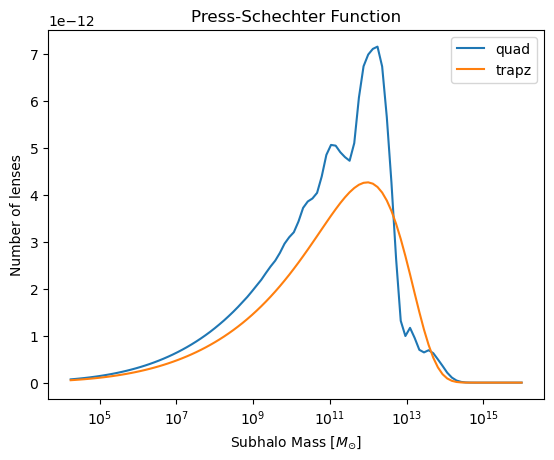

In [16]:
plt.title('Press-Schechter Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Number of lenses')
plt.plot(press_s.m_l[2:],press_s.n_l[2:], label='quad')
plt.plot(press_test.m_l[2:],press_test.n_l[2:], label='trapz')
plt.legend()
plt.show()

## Log-Likelihood testing

In [29]:
import pickle
import plotting as plot

with open('../results/samples_Roman_nfw_Press Schechter_1_1_2.pkl', 'rb') as f:
    data = pickle.load(f)

In [30]:
data.shape

(40, 2)

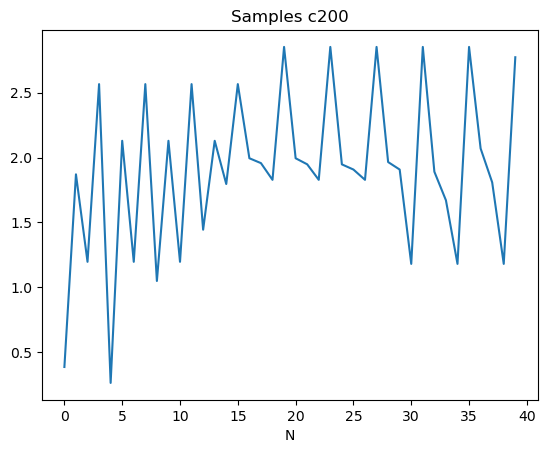

In [49]:
plt.plot(np.abs(data[:,0]))
#plt.yscale('log')
plt.title('Samples c200')
#plt.ylabel(r'$\mid \log \mathcal{L} \mid$');
plt.xlabel(r'N');

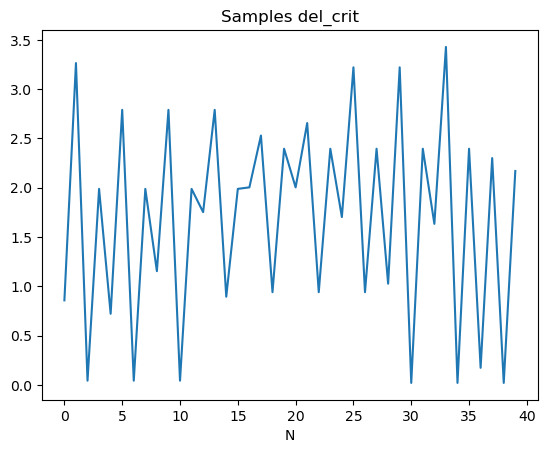

In [50]:
plt.plot(np.abs(data[:,1]))
#plt.yscale('log')
plt.title('Samples del_crit')
#plt.ylabel(r'$\mid \log \mathcal{L} \mid$');
plt.xlabel(r'N');

In [41]:
with open('../results/loglike_Roman_nfw_Press Schechter_1_1_2.pkl', 'rb') as f:
    data_log = pickle.load(f)

In [40]:
data_pruned.shape

(0,)

In [42]:
data_log.shape

(40,)

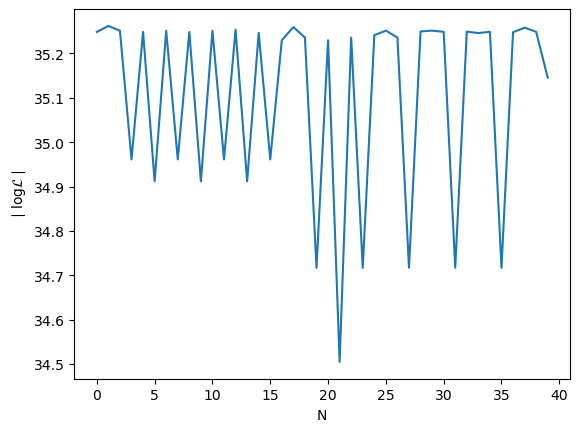

In [48]:
plt.plot(np.abs(data_log[:])) 
#plt.yscale('log')
plt.ylabel(r'$\mid \log \mathcal{L} \mid$');
plt.xlabel(r'N');